# Intel DevCloud OpenVINO Pretrained Model 人體姿態估測範例

歐尼克斯實境互動工作室 OmniXRI Jack, 2021.6.6

# 1. 安裝Intel OpenVINO工具包
以apt方式安裝OpenVINO，安裝版本為 2021.3.394  
預設安裝路徑為/opt/intel/OpenVINO_2021.3.394，系統會自建出/opt/intel/OpenVINO_2021捷徑名稱，後續可使用這個較短捷徑名稱。

In [1]:
# 顯示目前工作目錄
!pwd
# 取得OpenVINO 2021公開金錀
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 加入OpenVINO公開金錀到系統金錀群中
!apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021 
# 建立更新安裝清單檔案
!touch /etc/apt/sources.list.d/intel-openvino-2021.list
# 將下載指令加入安裝清單中
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" >> /etc/apt/sources.list.d/intel-openvino-2021.list
# 更新系統
!apt update
# 安裝OpenVINO到虛擬機系統中
!apt install intel-openvino-dev-ubuntu18-2021.3.394
# 列出安裝路徑下內容進行確認
!ls /opt/intel

/content
--2021-06-05 18:20:11--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 72.246.36.132, 2600:1405:800:19c::4b23, 2600:1405:800:182::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|72.246.36.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2021-06-05 18:20:12 (31.0 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021’ saved [939/939]

OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://apt.repos.intel.com/openvino/2021 all InRelease [5,647 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.n

# 2.下載模型

可選用人體姿態估測模型為

 *   human-pose-estimation-0001
 *   human-pose-estimation-0005
 *   human-pose-estimation-0006
 *   human-pose-estimation-0007

這裡選用 **--name human-pose-estimation-0007** （可自行變更所需模型名稱）

In [2]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/downloader.py --name human-pose-estimation-0007

[setupvars.sh] OpenVINO environment initialized
################|| Downloading human-pose-estimation-0007 ||################

========== Downloading /content/intel/human-pose-estimation-0007/FP32/human-pose-estimation-0007.xml
... 100%, 1025 KB, 1428 KB/s, 0 seconds passed

========== Downloading /content/intel/human-pose-estimation-0007/FP32/human-pose-estimation-0007.bin
... 100%, 31837 KB, 18718 KB/s, 1 seconds passed

========== Downloading /content/intel/human-pose-estimation-0007/FP16/human-pose-estimation-0007.xml
... 100%, 1024 KB, 1414 KB/s, 0 seconds passed

========== Downloading /content/intel/human-pose-estimation-0007/FP16/human-pose-estimation-0007.bin
... 100%, 15918 KB, 12449 KB/s, 1 seconds passed



# 3.模型轉換

如果下載的是Intel Pretrained Model則不需轉換就自帶IR檔(xml,bin)  
若是Public Pretrained Model則須進行轉換成IR檔，系統會自動判別。  
--name 參數為待轉換模型名稱

In [3]:
# 下載及安裝test-generator 方便檢查程式運行錯誤
!pip3 install test-generator==0.1.1

# 執行環境設定批次檔並將下載到的模型檔進行轉換產生IR(xml & bin)檔
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 /opt/intel/openvino_2021/deployment_tools/tools/model_downloader/converter.py \
--name human-pose-estimation-0007

# 檢查模型轉檔後會產生/FP16, FP32不同精度的IR檔(xml, bin)
!ls intel/human-pose-estimation-0007
!ls intel/human-pose-estimation-0007/FP32

[setupvars.sh] OpenVINO environment initialized
========== Skipping human-pose-estimation-0007 (no conversions defined)

FP16  FP32
human-pose-estimation-0007.bin	human-pose-estimation-0007.xml


# 4.準備測試影像

從網路獲取任意一張測試影像並顯示

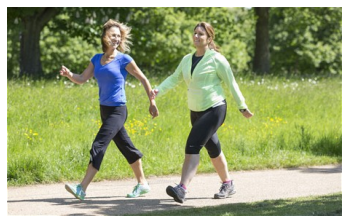

In [4]:
# 以OpenCV檢視輸入影像
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# 從網路獲取一張影像
file = requests.get("https://www.getactivecornwall.co.uk/files/imagelibrary/walking-2.jpg")
# 將影像轉成OpenCV格式存入img中
img = cv2.imdecode(np.frombuffer(file.content, np.uint8), 1)
# 將img寫入磁碟命名為input.jpg
cv2.imwrite('input.jpg',img)

# 亦可直接讀取本地端影像
# img = cv2.imread('input.jpg')

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 將影像從BGR格式轉到RGB格式，才能讓plt.imshow()正確顯示
plt.figure() # 準備一顯示影像空間
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(rgb) # 顯示影像

為更清楚了解物件偵測範例程式可支援的模型，可將models.lst及使用方式列出來確認。（此步驟可忽略）

In [5]:
# 列出可支援的模型名稱及對應的結構類型(architecture_type)
!cat /opt/intel/openvino_2021/inference_engine/demos/human_pose_estimation_demo/python/models.lst

# This file can be used with the --list option of the model downloader.
# For --architecture_type=openpose
human-pose-estimation-0001
# For --architecture_type=ae
human-pose-estimation-0005
human-pose-estimation-0006
human-pose-estimation-0007


# 5.進行推論

物件偵測範例程式 object_detection_demo.py

輸入參數： -at 架構型式(architecture_type) 須參考models.lst指定方式，human-pose-estimation-0007須搭配ae  
-i 輸入影像名稱 (.png, .jpg ...)  
-m 模型名稱 (.xml)  
-o 輸出結果名稱 (.png, *.jpg ...)  

最後顯示推論結果

[setupvars.sh] OpenVINO environment initialized
[ INFO ] Initializing Inference Engine...
[ INFO ] Loading network...
[ INFO ] Reading network from IR...
[ INFO ] Reshape net to {'image': [1, 3, 448, 736]}
[ INFO ] Loading network to CPU plugin...
[ INFO ] Starting inference...
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 8 and format 'image2 / image2 sequence'
To close the application, press 'CTRL+C' here or switch to the output window and press ESC key
Unable to init server: Could not connect: Connection refused
Traceback (most recent call last):
  File "/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/human_pose_estimation_demo/python/human_pose_estimation_demo.py", line 294, in <module>
    sys.exit(main() or 0)
  File "/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/human_pose_estimation_demo/python/human_pose_estimation_demo.py", line 233, in main
    cv2.imshow('Pose estimation results', frame)
cv2.error: OpenCV(4.5.2-open

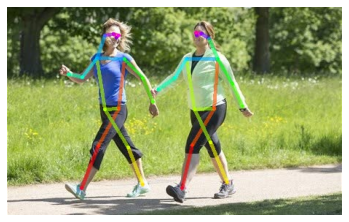

In [6]:
!source /opt/intel/openvino_2021/bin/setupvars.sh && \
python3 \
/opt/intel/openvino_2021/deployment_tools/inference_engine/demos/human_pose_estimation_demo/python/human_pose_estimation_demo.py -at ae \
-i 'input.jpg' \
-m intel/human-pose-estimation-0007/FP32/human-pose-estimation-0007.xml \
-o 'output.jpg'

!ls

out_img = cv2.imread('output.jpg') # 讀入欲顯示影像檔案
out_rgb = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB) # 將影像從BGR格式轉到RGB格式，才能讓plt.imshow()正確顯示
plt.figure() # 準備一顯示影像空間
plt.axis("off") # 設定關閉XY軸刻尺
plt.imshow(out_rgb) # 顯示影像